In [44]:
import tensorflow as tf
import os
import cv2
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Loading the dataset
train_df = 'train'
val_df = 'val'
test_df = 'test'

## We have loaded our dataset, the dataset is already splitted in training and testing set so all we need to do is to use deep learning model for X-ray image classification

In [6]:
# loading the necessary libraries for our model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convolutional Neural Network (CNN) Model

In [7]:
# Now, we define our model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# compiling the model 

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# we need to define the data generators for both the training and validation dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 32


train_generator = train_datagen.flow_from_directory(
    train_df,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_df,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5218 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
164/164 [==============================] - 677s 4s/step - loss: 0.4656 - accuracy: 0.7564 - val_loss: 1.4610 - val_accuracy: 0.6250
Epoch 2/25
164/164 [==============================] - 591s 4s/step - loss: 0.3590 - accuracy: 0.8323 - val_loss: 0.6737 - val_accuracy: 0.6875
Epoch 3/25
164/164 [==============================] - 591s 4s/step - loss: 0.2907 - accuracy: 0.8727 - val_loss: 1.5974 - val_accuracy: 0.6250
Epoch 4/25
164/164 [==============================] - 590s 4s/step - loss: 0.2913 - accuracy: 0.8735 - val_loss: 0.9109 - val_accuracy: 0.5625
Epoch 5/25
164/164 [==============================] - 593s 4s/step - loss: 0.2697 - accuracy: 0.8833 - val_loss: 1.2919 - val_accuracy: 0.6250
Epoch 6/25
164/164 [==============================] - 585s 4s/step - loss: 0.2422 - accuracy: 0.8967 - val_loss: 1.0630 - val_accuracy: 0.5625
Epoch 7/25
164/164 [==============================] - 561s 3s/step - loss: 0.2437 - accuracy: 0.8977 - val_loss: 0.7897 - val_accuracy: 0.6250

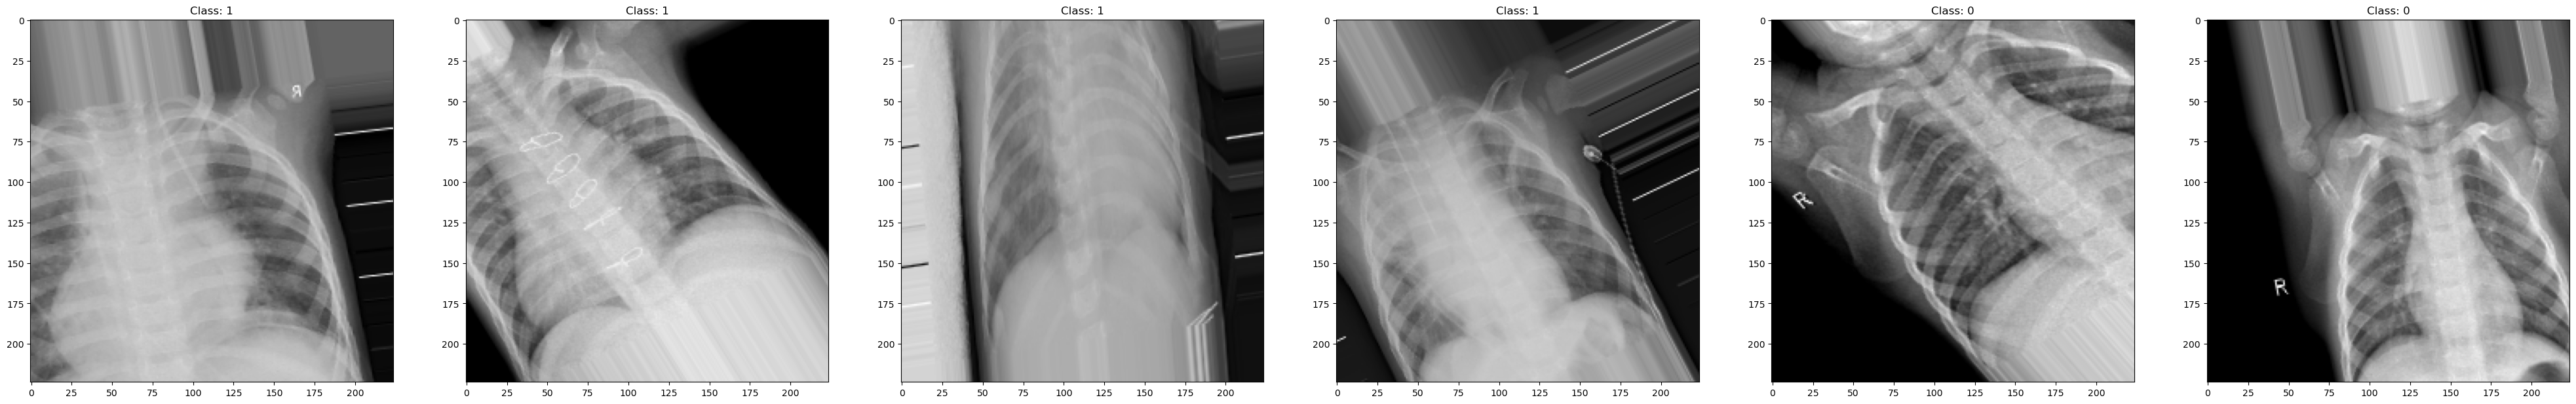

In [12]:
images, labels = next(train_generator)
plt.figure(figsize=(50, 60))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {int(labels[i])}")
plt.show()

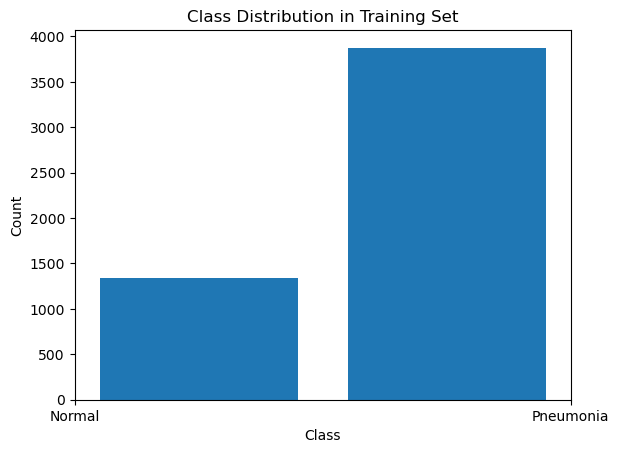

In [13]:
train_class_distribution = train_generator.classes
plt.hist(train_class_distribution, bins=2, rwidth=0.8)
plt.title('Class Distribution in Training Set')
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
mean_pixel_intensity = np.mean(images)
print(f"Mean Pixel Intensity: {mean_pixel_intensity}")

Mean Pixel Intensity: 0.4643929898738861


To give the model several chances to modify its weights and enhance its performance, epochs are used during training. The model starts with random weights and makes rough adjustments in the early epochs. The model adjusts its weights during additional training epochs in an attempt to get it to perform well on the training set.

The model has completed 25 epochs, although the training accuracy appears to have improved over time, the validation accuracy has fluctuated, suggesting that the model may be overfitting the data.

# Model Evaluation

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)

20/20 [==============================] - 34s 2s/step - loss: 0.6142 - accuracy: 0.8045


# Evaluation metrics: precision, recall, and F1-score

In [17]:
from sklearn.metrics import classification_report

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int) 

print(classification_report(y_true, y_pred))

20/20 [==============================] - 23s 1s/step
              precision    recall  f1-score   support

           0       0.35      0.18      0.24       234
           1       0.62      0.80      0.70       390

    accuracy                           0.57       624
   macro avg       0.48      0.49      0.47       624
weighted avg       0.52      0.57      0.53       624



In [18]:
from sklearn.metrics import confusion_matrix

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

20/20 [==============================] - 21s 1s/step


array([[ 40, 194],
       [ 80, 310]], dtype=int64)

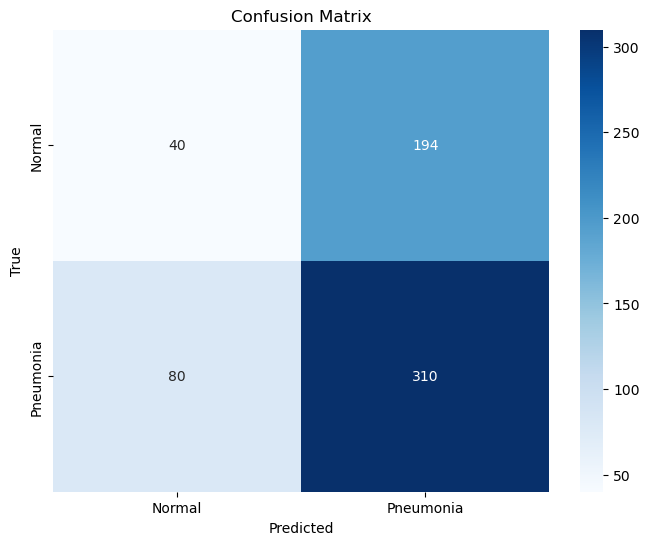

In [19]:
# Display the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Improving the Models Performance

According to the objective of this research, we planned to adapt the use of Pre-Trained Model (GoogLeNet, ResNet50 and VGG16) to improve the models performance.

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 51381249 (196.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


# Data Augmentation for Training Set

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
164/164 [==============================] - 1049s 6s/step - loss: 1.3535 - accuracy: 0.7627 - val_loss: 0.8271 - val_accuracy: 0.6250
Epoch 2/25
164/164 [==============================] - 1300s 8s/step - loss: 0.5055 - accuracy: 0.7850 - val_loss: 1.0633 - val_accuracy: 0.5625
Epoch 3/25
164/164 [==============================] - 1404s 9s/step - loss: 0.4375 - accuracy: 0.8055 - val_loss: 0.8639 - val_accuracy: 0.6250
Epoch 4/25
164/164 [==============================] - 1465s 9s/step - loss: 0.3773 - accuracy: 0.8275 - val_loss: 0.7876 - val_accuracy: 0.6250
Epoch 5/25
164/164 [==============================] - 1247s 8s/step - loss: 0.3776 - accuracy: 0.8220 - val_loss: 0.5235 - val_accuracy: 0.6875
Epoch 6/25
164/164 [==============================] - 1201s 7s/step - loss: 0.4046 - accuracy: 0.8108 - val_loss: 1.4193 - val_accuracy: 0.5625
Epoch 7/25
164/164 [==============================] - 1187s 7s/step - loss: 0.3823 - accuracy: 0.8314 - val_loss: 0.5695 - val_accuracy:

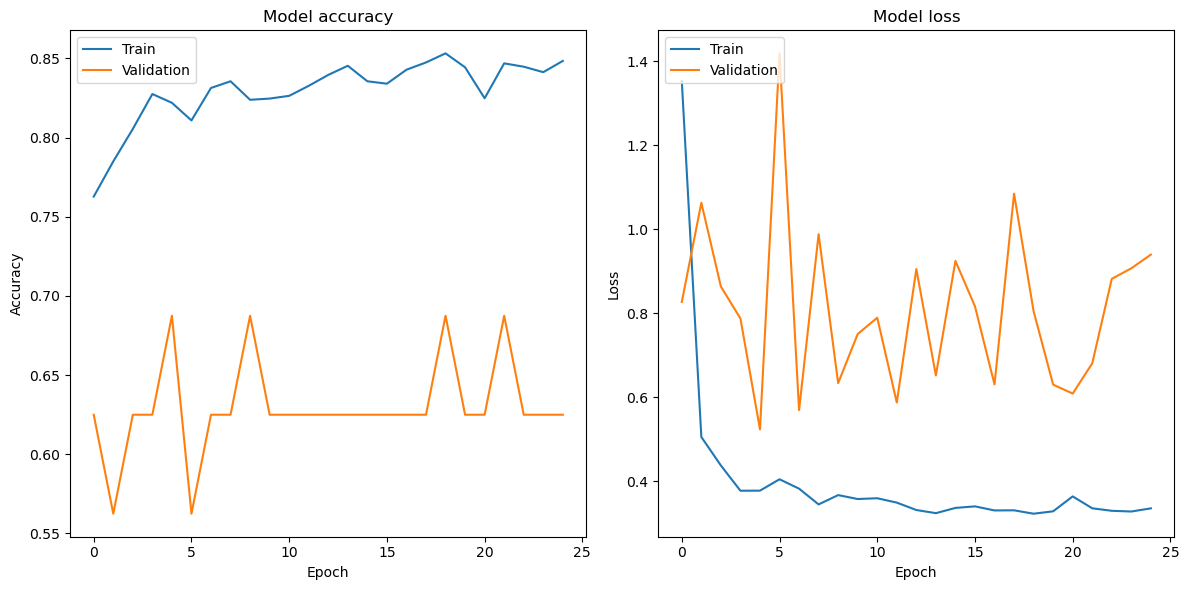

In [23]:
# Plotting the learning curves
plt.figure(figsize=(12, 6))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25, callbacks=[early_stopping])

Epoch 1/25
164/164 [==============================] - 924s 6s/step - loss: 0.3412 - accuracy: 0.8388 - val_loss: 0.9757 - val_accuracy: 0.6250
Epoch 2/25
164/164 [==============================] - 924s 6s/step - loss: 0.3369 - accuracy: 0.8396 - val_loss: 0.7828 - val_accuracy: 0.6250
Epoch 3/25
164/164 [==============================] - 921s 6s/step - loss: 0.3316 - accuracy: 0.8427 - val_loss: 0.8198 - val_accuracy: 0.6250
Epoch 4/25
164/164 [==============================] - 921s 6s/step - loss: 0.3196 - accuracy: 0.8507 - val_loss: 0.7296 - val_accuracy: 0.6250
Epoch 5/25
164/164 [==============================] - 920s 6s/step - loss: 0.3314 - accuracy: 0.8455 - val_loss: 0.5967 - val_accuracy: 0.6875
Epoch 6/25
164/164 [==============================] - 920s 6s/step - loss: 0.3172 - accuracy: 0.8526 - val_loss: 1.0111 - val_accuracy: 0.6250
Epoch 7/25
164/164 [==============================] - 921s 6s/step - loss: 0.3166 - accuracy: 0.8536 - val_loss: 1.2921 - val_accuracy: 0.6250

# Visualize some predictions on the test set

1/1 [==============================] - 5s 5s/step


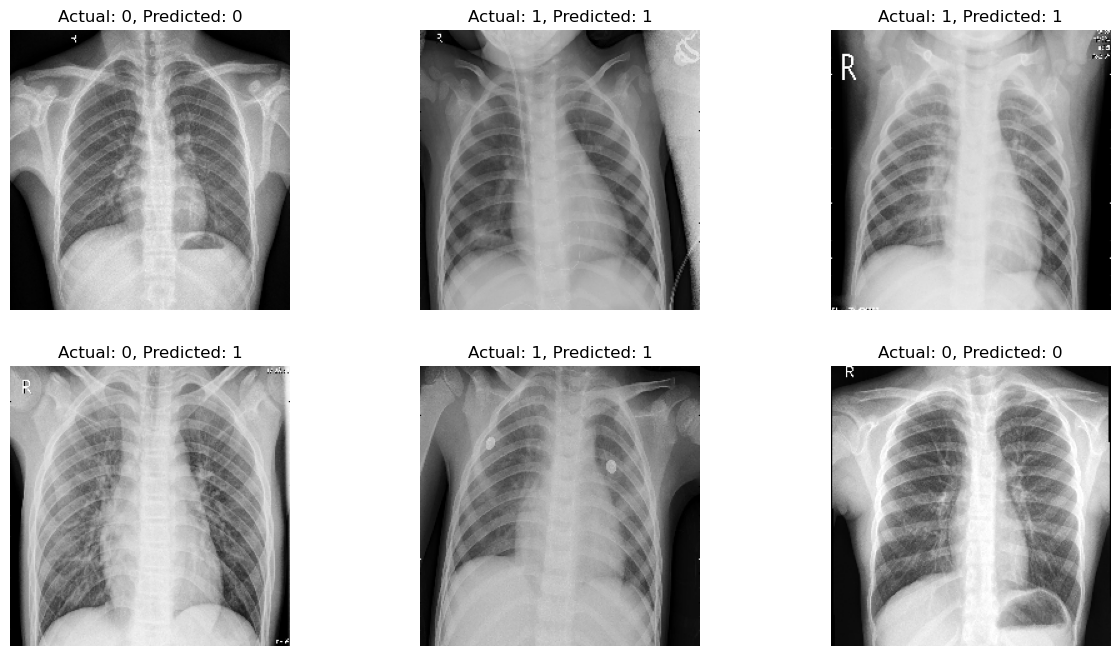

In [26]:
images, labels = next(test_generator)
predictions = model.predict(images)

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Actual: {int(labels[i])}, Predicted: {round(predictions[i][0])}")
    plt.axis('off')

plt.show()

1/1 [==============================] - 4s 4s/step


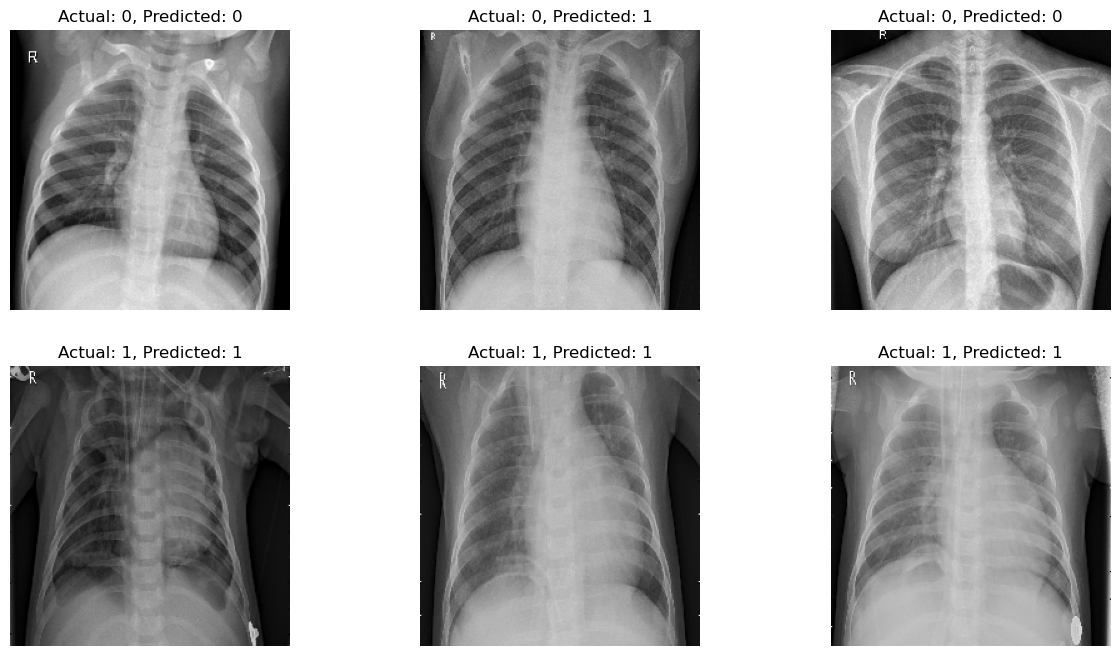

In [27]:
images, labels = next(test_generator)
predictions = model.predict(images)

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Actual: {int(labels[i])}, Predicted: {round(predictions[i][0])}")
    plt.axis('off')

plt.show()

# Fine-tuning and hyperparameter adjustment

In [28]:
model.layers[0].trainable = True 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Evaluation

In [29]:
from sklearn.metrics import precision_recall_fscore_support

test_loss, test_accuracy = model.evaluate(test_generator)
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

# Calculating the precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}')

20/20 [==============================] - 95s 5s/step
Precision: 0.6320, Recall: 0.5462, F1-Score: 0.5860


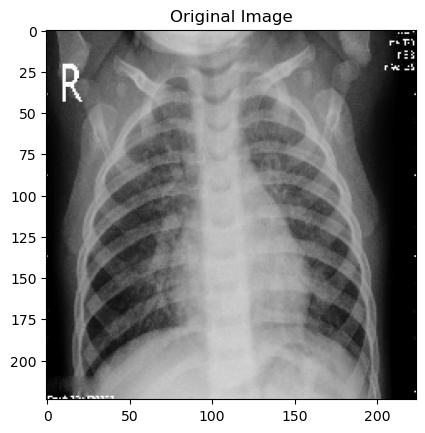

In [30]:
sample_image = np.expand_dims(test_generator.next()[0][0], axis=0)

plt.imshow(np.squeeze(sample_image))
plt.title('Original Image')
plt.show()

# Ploting the heatmap showing which parts of the image the model focused on

An activation heatmap is a visual representation of the regions of an input image that contributed the most to a specific prediction made by the model.

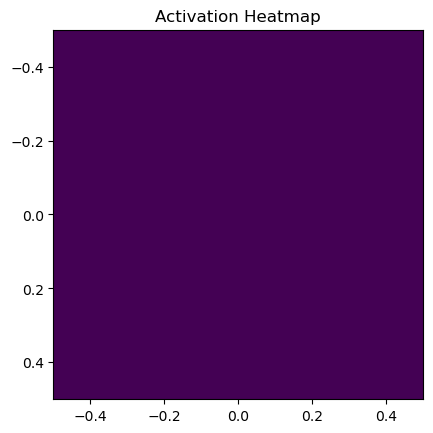

In [31]:
from tensorflow.keras.models import Model

last_dense_layer = model.get_layer('dense_3')
heatmap_model = Model([model.inputs], [last_dense_layer.output, model.output])

with tf.GradientTape() as tape:
    dense_outputs, predictions = heatmap_model(sample_image)
    class_channel = predictions[:, 0]

grads = tape.gradient(class_channel, dense_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0,))

heatmap = tf.reduce_mean(tf.multiply(dense_outputs, pooled_grads), axis=-1)

if len(heatmap.shape) == 3:
    heatmap = np.squeeze(heatmap, axis=0)

if len(heatmap.shape) == 1:
    heatmap = np.expand_dims(heatmap, axis=0)

plt.imshow(heatmap)
plt.title('Activation Heatmap')
plt.show()

In [32]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [33]:
def get_predictions(model, test_df):
    img = cv2.imread(test_df)
    if img is None:
        raise ValueError(f"Error loading image from path: {test_df}")
    
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    predictions = model.predict(img)
    return predictions

def generate_cam(model, test_df, last_conv_layer_name='resnet50'):
    original_img = cv2.imread(test_df)
    if original_img is None:
        raise ValueError(f"Error loading image from path: {test_df}")

    preds = get_predictions(model, test_df)
    class_idx = np.argmax(preds[0])

    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = Model(model.inputs, last_conv_layer.output)

    grads = K.gradients(model.output[:, class_idx], last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.inputs], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([img])

    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    return superimposed_img, class_idx

In [34]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(test_generator.classes, y_pred_class))

20/20 [==============================] - 93s 5s/step
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is still having difficulty with the classification task, particularly with class 1. Class 1 has low precision, recall, and F1-score, indicating that the model is not effectively identifying instances of that class.

# Handling Class Imbalance

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_set = train_datagen.flow_from_directory(
    'train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 5218 images belonging to 2 classes.


# Building CNN Model

In [36]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()
classifier.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=25,
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3936384   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3937409 (15.02 MB)
Trainable params: 3937409 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

# Evaluating Model

In [37]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_set = test_datagen.flow_from_directory(
    'test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

y_pred = classifier.predict(test_set)
y_pred = (y_pred > 0.5)
y_true = np.array(test_set.classes)

# Print the classification report
print(classification_report(y_true, y_pred))

Found 624 images belonging to 2 classes.
20/20 [==============================] - 10s 458ms/step
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       234
           1       0.87      0.95      0.91       390

    accuracy                           0.88       624
   macro avg       0.89      0.86      0.87       624
weighted avg       0.88      0.88      0.88       624



The classification report is now correctly displayed. For both classes, our model achieved high precision, recall, and F1-score. The accuracy is also quite high, at 88%.

Classification report is important in our analysis and has displayed a good record, but we might consider adding more analysis like confusion matrix, ROC.

# Generating the confusion matrix

20/20 [==============================] - 110s 6s/step


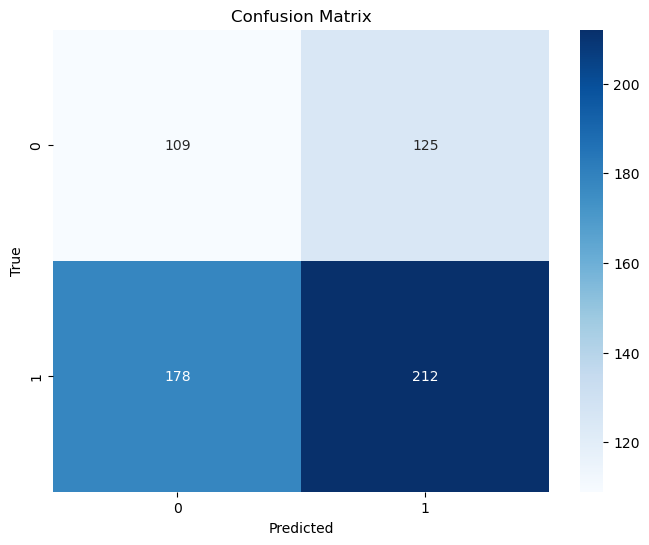

In [38]:
y_pred = model.predict(test_generator)

y_pred_binary = (y_pred > 0.5).astype(int)

y_true = test_generator.classes

conf = confusion_matrix(y_true, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Computing the ROC curve and ROC area

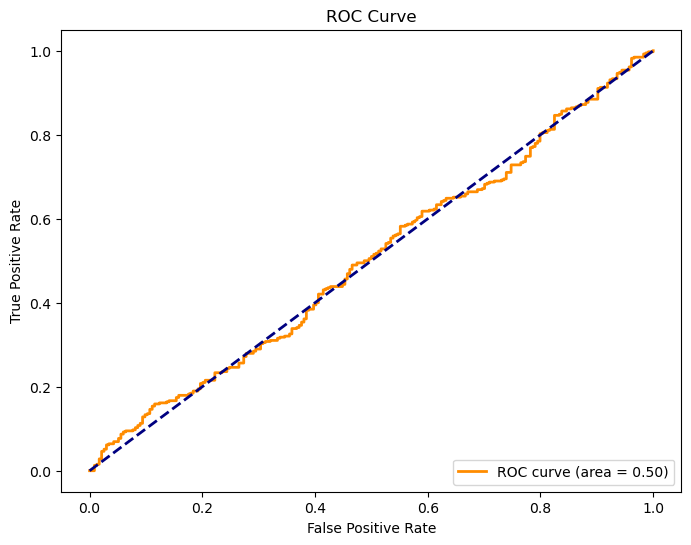

In [41]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()